In [2]:
import gdown
import pandas as pd
import io
import requests
import os

from google.oauth2 import service_account
from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload

import warnings
warnings.filterwarnings("ignore")

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap.umap_ as umap

In [3]:

SERVICE_ACCOUNT_FILE = 'service_account.json'
SCOPES = ['https://www.googleapis.com/auth/drive.readonly']

def load_csv_from_drive(file_id: str) -> pd.DataFrame:
    creds = service_account.Credentials.from_service_account_file(
        SERVICE_ACCOUNT_FILE, scopes=SCOPES
    )
    
    service = build('drive', 'v3', credentials=creds)

    request = service.files().get_media(fileId=file_id)
    fh = io.BytesIO()
    downloader = MediaIoBaseDownload(fh, request)

    done = False
    while not done:
        status, done = downloader.next_chunk()

    fh.seek(0)
    return pd.read_csv(fh)

In [4]:
# file_id = "1N3IuNsbmBW3kNttLxoJ4QrAFG2Of1ifC"
# df = load_csv_from_drive(file_id)
# df.head()

In [5]:
df = pd.read_csv("Search_terms.csv")
len(df)

157245

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')
search_terms = df['Search term'].astype(str).tolist()
embeddings = model.encode(search_terms)

In [62]:
k = 8
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(embeddings)

df['Cluster'] = labels

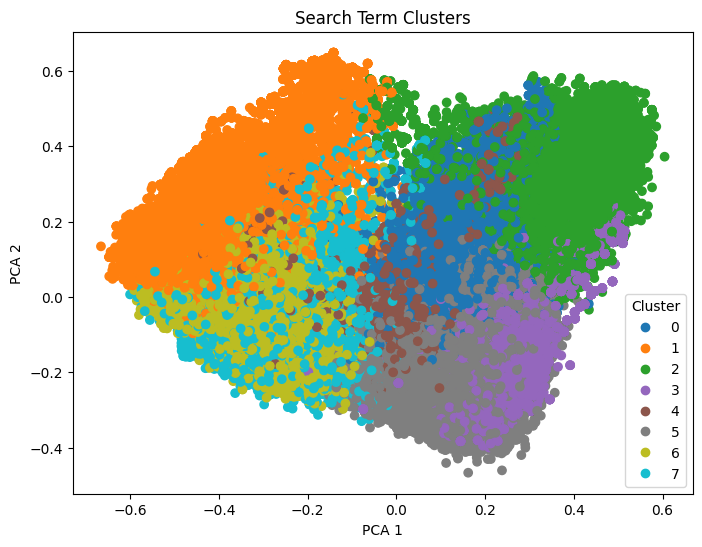

In [ ]:


# Reduce dimensionality to 2D for plotting
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_embeddings = reducer.fit_transform(embeddings)

# Plot the UMAP result
plt.figure(figsize=(10, 7))
scatter = plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=labels, cmap='tab10', s=50, alpha=0.8)
plt.title("UMAP Clustering of Search Terms")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()
